# Comparison

## Import Library

In [1]:
import cv2
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

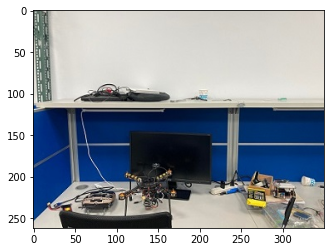

In [2]:
# Loading the raw image
raw_image = cv2.imread('./images/image1.jpg')
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
plt.imshow(raw_image)

# Get the geometry imformation of the raw image
(h, w, d) = raw_image.shape
center = (w // 2, h // 2)

## Image Transformation
`Rotation` 、 `Brightness` 、 `Zoom` 、 `Translation`

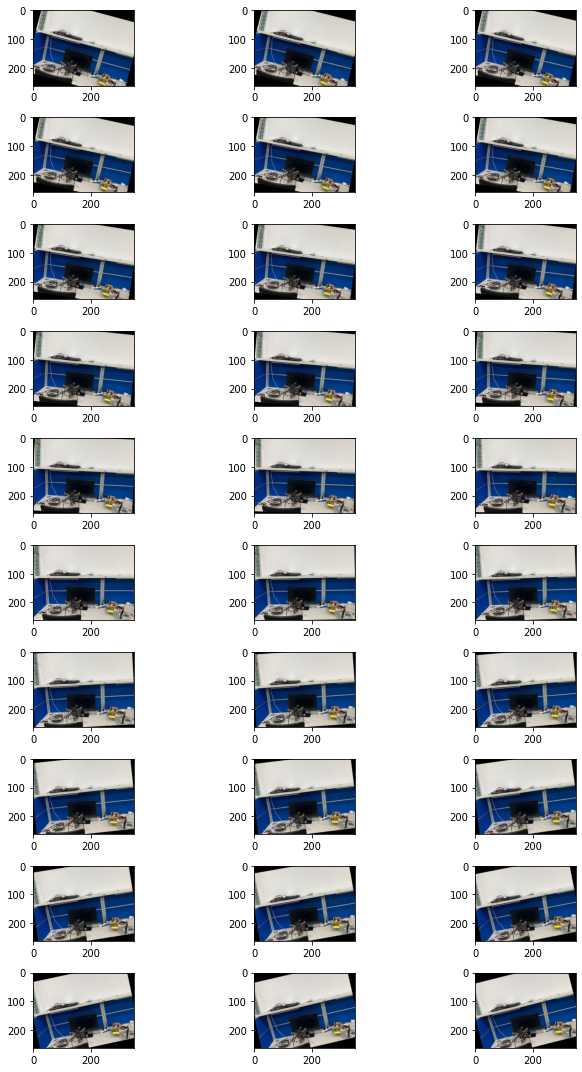

In [3]:
# Rotation
angle = range(-15,15,1)
rotate_image = []
for i in angle:
    matrix = cv2.getRotationMatrix2D(center, i, 1.0)
    rotate_image.append(cv2.warpAffine(raw_image, matrix, (w, h)))
    
rows, cols, index = 10, 3, 1
axes = []
fig = plt.figure(figsize=(10, 15))
for images in rotate_image:
    axes.append(fig.add_subplot(rows, cols, index))
    plt.imshow(images)
    index += 1
    
plt.tight_layout()
plt.show()

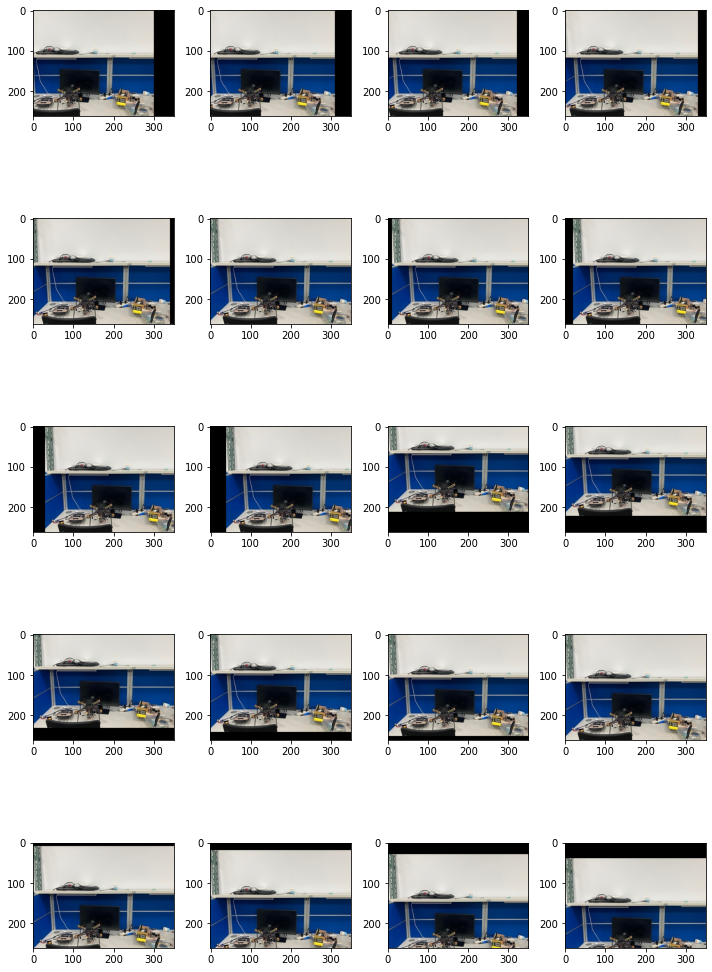

In [4]:
# Translation
x_trans = range(-50, 50, 10)
y_trans = range(-50, 50, 10)
trans_image = []
for x in x_trans:
    matrix = np.float32([[1, 0, x], [0, 1, 0]])
    trans_image.append(cv2.warpAffine(raw_image, matrix, (w, h)))
    
for y in y_trans:
    matrix = np.float32([[1, 0, 0], [0, 1, y]])
    trans_image.append(cv2.warpAffine(raw_image, matrix, (w, h)))
    
rows, cols, index = 5, 4, 1
axes = []
fig = plt.figure(figsize=(10, 15))
for images in trans_image:
    axes.append(fig.add_subplot(rows, cols, index))
    plt.imshow(images)
    index += 1
    
plt.tight_layout()
plt.show()

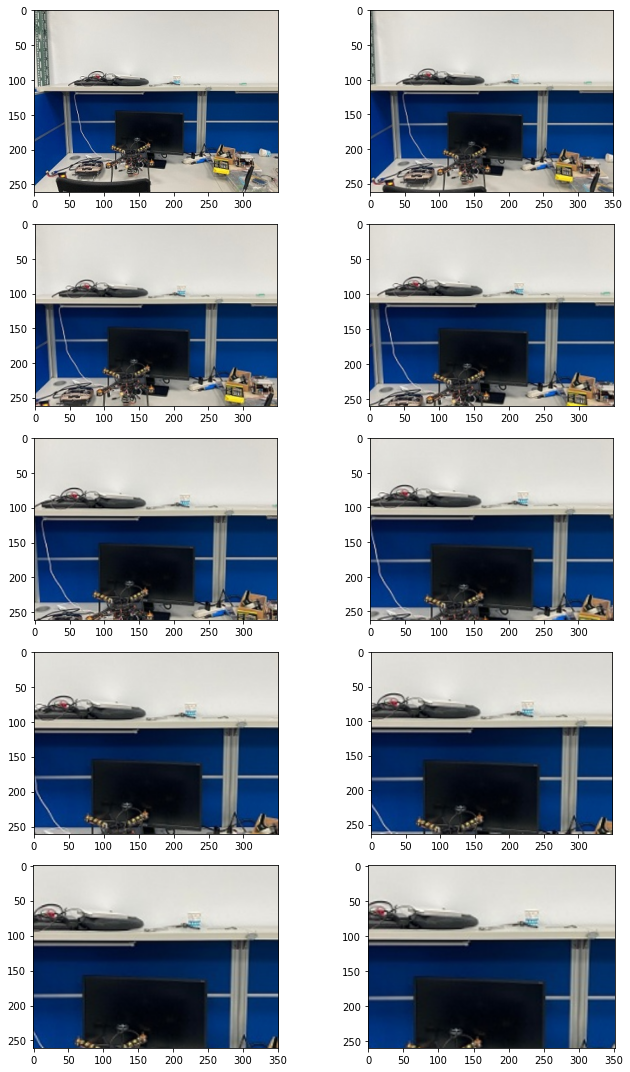

In [5]:
# Zoom
def zoom_center(img, zoom_factor=1.5):

    y_size = img.shape[0]
    x_size = img.shape[1]
    
    # define new boundaries
    x1 = int(0.5*x_size*(1-1/zoom_factor))
    x2 = int(x_size-0.5*x_size*(1-1/zoom_factor))
    y1 = int(0.5*y_size*(1-1/zoom_factor))
    y2 = int(y_size-0.5*y_size*(1-1/zoom_factor))

    # first crop image then scale
    img_cropped = img[y1:y2,x1:x2]
    return cv2.resize(img_cropped, None, fx=zoom_factor, fy=zoom_factor)

ratio = np.arange(1.0, 2.0, 0.1)
zoom_image = []
for r in ratio:
    img_zoomed_and_cropped = zoom_center(raw_image, r)
    zoom_image.append(img_zoomed_and_cropped)
    
rows, cols, index = 5, 2, 1
axes = []
fig = plt.figure(figsize=(10, 15))
for images in zoom_image:
    axes.append(fig.add_subplot(rows, cols, index))
    plt.imshow(images)
    index += 1
    
plt.tight_layout()
plt.show()

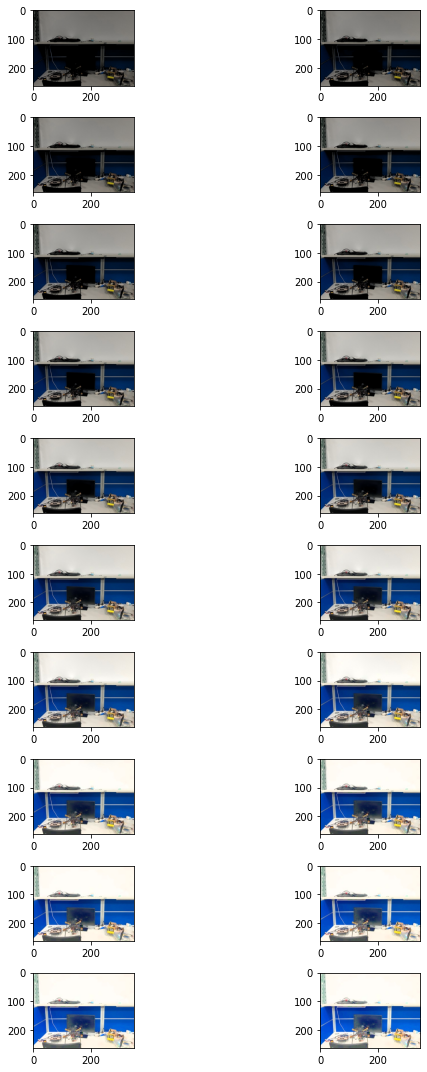

In [6]:
# Brightness
value = range(-100, 100, 10)
hsv = cv2.cvtColor(raw_image, cv2.COLOR_RGB2HSV)
(h, s, v) = cv2.split(hsv)
bright_image = []
for va in value:
    hsv = cv2.cvtColor(raw_image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,va)
    v[v > 255] = 255
    v[v < 0] = 0
    new_hsv = cv2.merge((h, s, v))
    bright_image.append(cv2.cvtColor(new_hsv, cv2.COLOR_HSV2RGB))
    
rows, cols, index = 10, 2, 1
axes = []
fig = plt.figure(figsize=(10, 15))
for images in bright_image:
    axes.append(fig.add_subplot(rows, cols, index))
    plt.imshow(images)
    index += 1
    
plt.tight_layout()
plt.show()

## Time Cost

In [101]:
# raw image process
train_gray = cv2.cvtColor(raw_image, cv2.COLOR_RGB2GRAY)
time_cost = []

# SIFT
sift = cv2.SIFT_create()
train_keypoints, train_descriptor = sift.detectAndCompute(train_gray, None)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)
sift_cost = []


# for rotate data
sift_cost.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    sift_cost[0].append(duration)

sift_cost.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    sift_cost[1].append(duration)
    
sift_cost.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    sift_cost[2].append(duration)
    
sift_cost.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    sift_cost[3].append(duration)
    
# sns.boxplot(data=sift_cost)

# ORB
orb = cv2.ORB_create()
train_keypoints, train_descriptor = orb.detectAndCompute(train_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
orb_cost = []

# for rotate data
orb_cost.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    orb_cost[0].append(duration)

# translation
orb_cost.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    orb_cost[1].append(duration)

# zoom in
orb_cost.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    orb_cost[2].append(duration)

# brightness
orb_cost.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    orb_cost[3].append(duration)
    

# sns.boxplot(data=orb_cost)

# BRISK 
brisk = cv2.BRISK_create()
train_keypoints, train_descriptor = brisk.detectAndCompute(train_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
brisk_cost = []

# for rotate data
brisk_cost.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    brisk_cost[0].append(duration)

# translation
brisk_cost.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    brisk_cost[1].append(duration)

# zoom in
brisk_cost.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    brisk_cost[2].append(duration)

# brightness
brisk_cost.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    brisk_cost[3].append(duration)
    
# sns.boxplot(data=brisk_cost)

# FAST+BRIEF
fast = cv2.FastFeatureDetector_create()
brief = cv2.xfeatures2d_BriefDescriptorExtractor.create()
train_keypoints = fast.detect(train_gray, None)
train_keypoints, train_descriptor = brief.compute(train_gray, train_keypoints)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
fbrief_cost = []

# for rotate data
fbrief_cost.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    fbrief_cost[0].append(duration)

# translation
fbrief_cost.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    fbrief_cost[1].append(duration)

# zoom in
fbrief_cost.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    fbrief_cost[2].append(duration)

# brightness
fbrief_cost.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    start = time.time()
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    end  = time.time()
    duration = end - start
    fbrief_cost[3].append(duration)
    
# sns.boxplot(data=brisk_cost)

<AxesSubplot:>

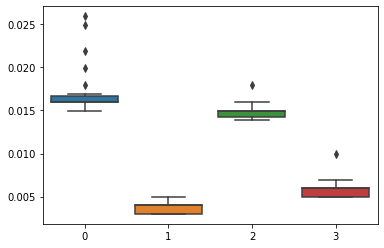

In [102]:
sns.boxplot(data=[sift_cost[0], orb_cost[0], brisk_cost[0], fbrief_cost[0]])

<AxesSubplot:>

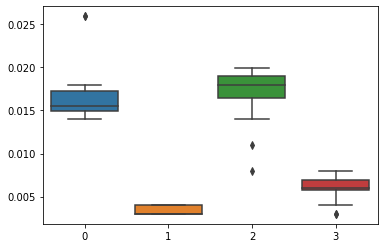

In [103]:
sns.boxplot(data=[sift_cost[1], orb_cost[1], brisk_cost[1], fbrief_cost[1]])

<AxesSubplot:>

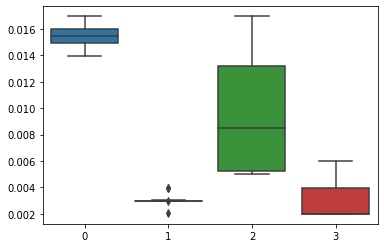

In [104]:
sns.boxplot(data=[sift_cost[2], orb_cost[2], brisk_cost[2], fbrief_cost[2]])

<AxesSubplot:>

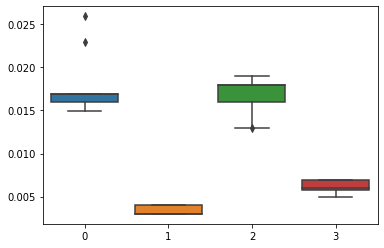

In [105]:
sns.boxplot(data=[sift_cost[3], orb_cost[3], brisk_cost[3], fbrief_cost[3]])

In [108]:
def Average(lst):
    return sum(lst) / len(lst)

print("        Rotate        translation         zoom in            brightness    ")
print("===========================================================================")
sift_cost_avg = []
for i in sift_cost:
    sift_cost_avg.append(Average(i))

print(sift_cost_avg)

orb_cost_avg = []
for i in orb_cost:
    orb_cost_avg.append(Average(i))

print(orb_cost_avg)
    
brisk_cost_avg = []
for i in brisk_cost:
    brisk_cost_avg.append(Average(i))

print(brisk_cost_avg)
fbrief_cost_avg = []
for i in fbrief_cost:
    fbrief_cost_avg.append(Average(i))

print(fbrief_cost_avg)

        Rotate        translation         zoom in            brightness    
[0.01698788007100423, 0.01680506467819214, 0.015358924865722656, 0.017204034328460693]
[0.003658755620320638, 0.003395664691925049, 0.003091764450073242, 0.003396773338317871]
[0.014925424257914226, 0.016954612731933594, 0.009574413299560547, 0.016855597496032715]
[0.005716792742411296, 0.005884253978729248, 0.003091764450073242, 0.006033849716186523]


## Accuracy

In [24]:
# raw image process
train_gray = cv2.cvtColor(raw_image, cv2.COLOR_RGB2GRAY)
time_cost = []

# SIFT
sift = cv2.SIFT_create()
train_keypoints, train_descriptor = sift.detectAndCompute(train_gray, None)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)
sift_acc = []


# for rotate data
sift_acc.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    sift_acc[0].append(acc)

sift_acc.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    sift_acc[1].append(acc)
    
sift_acc.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    sift_acc[2].append(acc)
    
sift_acc.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    sift_acc[3].append(acc)
    
# sns.boxplot(data=sift_acc)

orb = cv2.ORB_create()
train_keypoints, train_descriptor = orb.detectAndCompute(train_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
orb_acc = []


# for rotate data
orb_acc.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    orb_acc[0].append(acc)

orb_acc.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    orb_acc[1].append(acc)
    
orb_acc.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    orb_acc[2].append(acc)
    
orb_acc.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    orb_acc[3].append(acc)
    
# sns.boxplot(data=orb_acc)

# BRISK 
brisk = cv2.BRISK_create()
train_keypoints, train_descriptor = brisk.detectAndCompute(train_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
brisk_acc = []

# for rotate data
brisk_acc.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    brisk_acc[0].append(acc)

# translation
brisk_acc.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    brisk_acc[1].append(acc)

# zoom in
brisk_acc.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    brisk_acc[2].append(acc)

# brightness
brisk_acc.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints, test_descriptor = brisk.detectAndCompute(test_gray, None)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    brisk_acc[3].append(acc)
    
# sns.boxplot(data=brisk_cost)

fast = cv2.FastFeatureDetector_create()
brief = cv2.xfeatures2d_BriefDescriptorExtractor.create()
train_keypoints = fast.detect(train_gray, None)
train_keypoints, train_descriptor = brief.compute(train_gray, train_keypoints)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
fbrief_acc = []

# for rotate data
fbrief_acc.append([])
for image in rotate_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    fbrief_acc[0].append(acc)

# translation
fbrief_acc.append([])
for image in trans_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    fbrief_acc[1].append(acc)

# zoom in
fbrief_acc.append([])
for image in zoom_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    fbrief_acc[2].append(acc)

# brightness
fbrief_acc.append([])
for image in bright_image:
    test_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    test_keypoints = fast.detect(test_gray, None)
    test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)
    matches = bf.match(train_descriptor, test_descriptor)
    acc = len(matches) / max(len(test_keypoints), len(train_keypoints))
    fbrief_acc[3].append(acc)
    
# sns.boxplot(data=brisk_cost)

<AxesSubplot:>

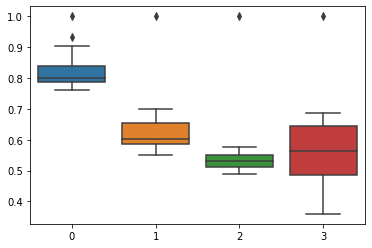

In [25]:
sns.boxplot(data=[sift_acc[0], orb_acc[0], brisk_acc[0], fbrief_acc[0]])

<AxesSubplot:>

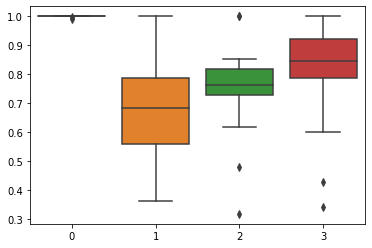

In [26]:
sns.boxplot(data=[sift_acc[1], orb_acc[1], brisk_acc[1], fbrief_acc[1]])

<AxesSubplot:>

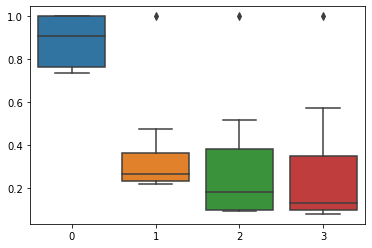

In [27]:
sns.boxplot(data=[sift_acc[2], orb_acc[2], brisk_acc[2], fbrief_acc[2]])

<AxesSubplot:>

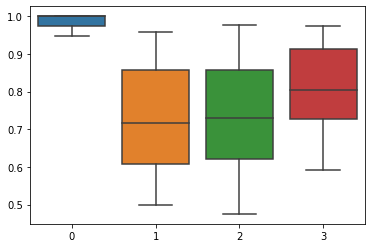

In [28]:
sns.boxplot(data=[sift_acc[3], orb_acc[3], brisk_acc[3], fbrief_acc[3]])